<a href="https://colab.research.google.com/github/muhaseeb34/Data3001-Modelling-2/blob/main/InfoG-DTree-new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
from google.colab import files
uploaded = files.upload()

Saving new_data.csv to new_data (1).csv


In [38]:
# === IMPORTS ===
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

df = pd.read_csv("new_data.csv")
print("Original data shape:", df.shape)
df

Original data shape: (825, 177)


,lap_id,invalid_lap,BPS_SPEED,BPS_THROTTLE,BPS_STEER,BPS_BRAKE,BPS_LAPDISTANCE,BPS_WORLDPOSITIONX,BPS_WORLDPOSITIONY,BPS_WORLDFORWARDDIRX,...,APX2_YAW,APX2_PITCH,APX2_ROLL,APX2_left_dist,APX2_dist_apex_1,APX2_dist_apex_2,APX2_angle_to_apex1,APX2_angle_to_apex2,APX2_proj_from_ref,Target_CURRENTLAPTIMEINMS
0,10021698834789871149_1,1,316.0,1.000000,0.074568,0.0,223.0,274.071987,313.458779,-23579.0,...,-2.906792,0.002597,-0.015706,1.188303,101.216786,1.468423,176.387023,-73.297876,1.243211,15377
1,10021698834789871149_10,1,324.0,0.970802,0.000464,0.0,273.0,310.096901,278.846172,-23824.0,...,-2.975512,-0.004548,-0.010439,1.716472,101.368594,0.941933,178.312192,-68.980181,0.715854,12146
2,10021698834789871149_11,1,322.0,1.000000,-0.002375,0.0,258.0,298.743940,288.688005,-23746.0,...,-2.922204,-0.003019,-0.011373,2.731520,101.668646,0.122973,176.987177,53.851467,0.297512,12220
3,10021698834789871149_12,0,322.0,0.025177,0.006011,0.0,269.0,307.165908,281.569461,-23818.0,...,-2.923212,-0.002735,-0.009557,1.879479,101.417020,0.779785,177.377583,-68.683995,0.553155,12219
4,10021698834789871149_13,1,324.0,1.000000,0.021114,0.0,268.0,306.397540,282.215448,-23831.0,...,-2.824224,0.006822,-0.014098,4.818916,102.315233,2.167787,173.829692,99.915419,2.381417,12881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,9874269645241895165_2,1,144.0,0.000000,-0.525250,0.0,450.0,369.369267,134.915112,5165.0,...,-2.974651,-0.000140,-0.022406,2.409240,105.101572,7.066486,179.753790,-120.396863,5.033546,13686
821,9941972541231747669_1,1,324.0,1.000000,0.000000,0.0,263.0,302.615240,285.497492,-23572.0,...,-2.875317,-0.000517,-0.010140,1.617995,101.340908,1.039864,176.906931,-71.039304,0.814210,12490
822,9941972541231747669_2,0,324.0,1.000000,-0.000000,0.0,264.0,303.184481,284.646456,-23649.0,...,-2.914761,-0.002244,-0.008611,1.437935,101.289007,1.219306,177.457928,-71.360891,0.993987,12326
823,9948558370850722411_1,1,324.0,1.000000,-0.003344,0.0,276.0,301.987594,286.287858,-24030.0,...,-2.907833,0.001437,-0.014618,2.980371,101.744896,0.340118,175.711551,87.320007,0.545892,13604


In [39]:
DROPPED = [
    "dist_360_SPEED", "dist_360_THROTTLE", "dist_360_STEER", "dist_360_BRAKE",
    "dist_360_CURRENTLAPTIMEINMS", "dist_360_LAPDISTANCE", "dist_360_WORLDPOSITIONX", "dist_360_WORLDPOSITIONY",
    "dist_360_WORLDFORWARDDIRX", "dist_360_WORLDFORWARDDIRY", "dist_360_YAW", "dist_360_PITCH",
    "dist_360_ROLL", "dist_360_left_dist", "dist_360_right_dist", "dist_360_dist_apex_1",
    "dist_360_dist_apex_2", "dist_360_angle_to_apex1", "dist_360_angle_to_apex2", "dist_360_proj_from_ref",
    "dist_430_SPEED", "dist_430_THROTTLE", "dist_430_STEER", "dist_430_BRAKE",
    "dist_430_CURRENTLAPTIMEINMS", "dist_430_LAPDISTANCE", "dist_430_WORLDPOSITIONX", "dist_430_WORLDPOSITIONY",
    "dist_430_WORLDFORWARDDIRX", "dist_430_WORLDFORWARDDIRY", "dist_430_YAW", "dist_430_PITCH",
    "dist_430_ROLL", "dist_430_left_dist", "dist_430_right_dist", "dist_430_dist_apex_1",
    "dist_430_dist_apex_2", "dist_430_angle_to_apex1", "dist_430_angle_to_apex2", "dist_430_proj_from_ref",
    "dist_530_SPEED", "dist_530_THROTTLE", "dist_530_STEER", "dist_530_BRAKE",
    "dist_530_CURRENTLAPTIMEINMS", "dist_530_LAPDISTANCE", "dist_530_WORLDPOSITIONX", "dist_530_WORLDPOSITIONY",
    "dist_530_WORLDFORWARDDIRX", "dist_530_WORLDFORWARDDIRY", "dist_530_YAW", "dist_530_PITCH",
    "dist_530_ROLL", "dist_530_left_dist", "dist_530_right_dist", "dist_530_dist_apex_1",
    "dist_530_dist_apex_2", "dist_530_angle_to_apex1", "dist_530_angle_to_apex2", "dist_530_proj_from_ref",
    "BPS_right_dist", "BPE_right_dist", "THS_right_dist", "THE_right_dist", "STS_right_dist",
    "STM_right_dist", "STE_right_dist", "APX1_right_dist", "APX2_right_dist", "BPS_CURRENTLAPTIMEINMS",
    "BPE_CURRENTLAPTIMEINMS", "THS_CURRENTLAPTIMEINMS", "THE_CURRENTLAPTIMEINMS", "STS_CURRENTLAPTIMEINMS",
    "STM_CURRENTLAPTIMEINMS", "STE_CURRENTLAPTIMEINMS", "APX1_CURRENTLAPTIMEINMS", "APX2_CURRENTLAPTIMEINMS"
]

In [40]:
# === CLEAN DATA ===
data = df.drop(columns=DROPPED, errors='ignore').dropna().drop_duplicates()
data = data[data['invalid_lap'] == 0]  # Keep only valid laps
data = data[data['Target_CURRENTLAPTIMEINMS'] < 60000]  # Reasonable lap times

# === PREPARE FEATURES & TARGET ===
X = data.drop(columns=['lap_id', 'invalid_lap', 'Target_CURRENTLAPTIMEINMS'])
y = data['Target_CURRENTLAPTIMEINMS']

print(f"After cleaning: {X.shape[1]} features, {X.shape[0]} samples")
print(f"Target range: {y.min():.0f} to {y.max():.0f} ms")
print(f"Average lap time: {y.mean():.0f} ms")

After cleaning: 174 features, 313 samples
Target range: 12204 to 57223 ms
Average lap time: 13428 ms


In [41]:
# === SPLIT DATA ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === ORIGINAL TREE ===
print("=== TRAINING ORIGINAL TREE ===")
dt_original = DecisionTreeRegressor(
    max_depth=5,
    random_state=42,
    min_samples_split=20,
    min_samples_leaf=10
)
dt_original.fit(X_train, y_train)

=== TRAINING ORIGINAL TREE ===


DecisionTreeRegressor(max_depth=5, min_samples_leaf=10, min_samples_split=20,
                      random_state=42)

In [42]:
# === ORIGINAL TREE PERFORMANCE (RMSE) ===
y_train_pred_orig = dt_original.predict(X_train)
y_test_pred_orig = dt_original.predict(X_test)

train_rmse_orig = np.sqrt(mean_squared_error(y_train, y_train_pred_orig))
test_rmse_orig = np.sqrt(mean_squared_error(y_test, y_test_pred_orig))

print("ORIGINAL TREE PERFORMANCE:")
print(f"Training RMSE: {train_rmse_orig:.2f} ms")
print(f"Testing RMSE:  {test_rmse_orig:.2f} ms")
print(f"Error %: {test_rmse_orig / y.mean() * 100:.2f}%")


ORIGINAL TREE PERFORMANCE:
Training RMSE: 2437.66 ms
Testing RMSE:  992.44 ms
Error %: 7.39%


In [43]:
# === ORIGINAL TREE FEATURE IMPORTANCE ===
feature_importances_orig = dt_original.feature_importances_
importance_df_orig = pd.DataFrame({
    'feature': X.columns,
    'importance': feature_importances_orig
}).sort_values('importance', ascending=False)

print("\n=== ORIGINAL TREE - TOP FEATURES ===")
print(importance_df_orig.head(10))
non_zero_orig = (importance_df_orig['importance'] > 0).sum()
print(f"Features with non-zero importance: {non_zero_orig}")


=== ORIGINAL TREE - TOP FEATURES ===
                  feature  importance
156            APX2_SPEED    0.880578
0               BPS_SPEED    0.075210
100             STM_SPEED    0.020839
138            APX1_SPEED    0.016919
140            APX1_STEER    0.003906
60              THE_SPEED    0.001571
58    THS_ext_LAPDISTANCE    0.000977
7    BPS_WORLDFORWARDDIRX    0.000000
6      BPS_WORLDPOSITIONY    0.000000
1            BPS_THROTTLE    0.000000
Features with non-zero importance: 7


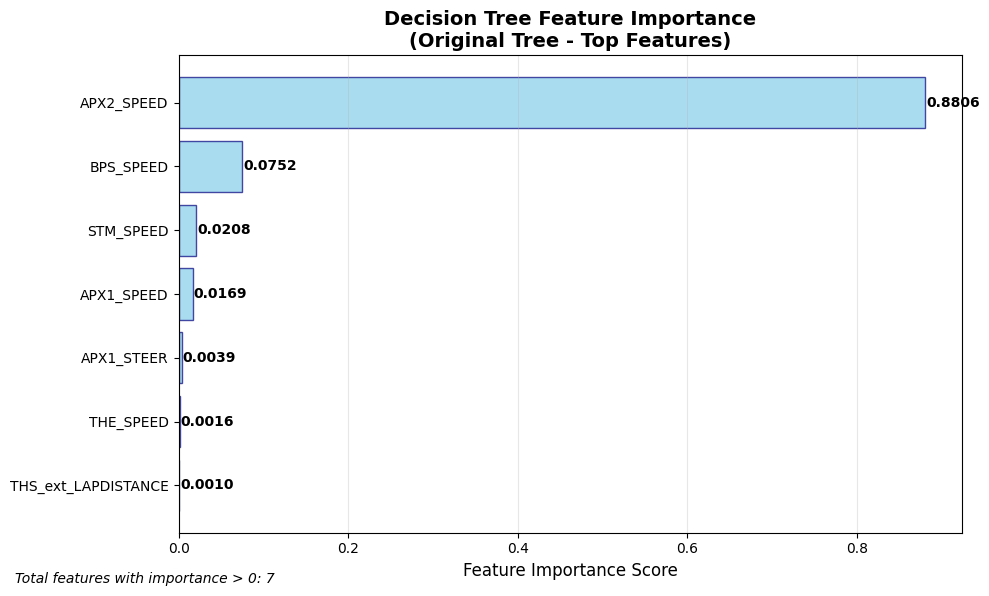

=== FEATURE IMPORTANCE SUMMARY ===
Total features analyzed: 10
Features with importance > 0: 7
Most important feature: APX2_SPEED (0.8806)
Dominance: 88.1% of total importance


In [46]:
import matplotlib.pyplot as plt
import pandas as pd

# Your data
importance_data = {
    'feature': [
        'APX2_SPEED', 'BPS_SPEED', 'STM_SPEED', 'APX1_SPEED',
        'APX1_STEER', 'THE_SPEED', 'THS_ext_LAPDISTANCE',
        'BPS_WORLDFORWARDDIRX', 'BPS_WORLDPOSITIONY', 'BPS_THROTTLE'
    ],
    'importance': [
        0.880578, 0.075210, 0.020839, 0.016919, 0.003906,
        0.001571, 0.000977, 0.000000, 0.000000, 0.000000
    ]
}

importance_df = pd.DataFrame(importance_data)

# Filter out zero-importance features for cleaner visualization
non_zero_df = importance_df[importance_df['importance'] > 0]

# Create the graph
plt.figure(figsize=(10, 6))
bars = plt.barh(non_zero_df['feature'], non_zero_df['importance'],
                color='skyblue', edgecolor='navy', alpha=0.7)

# Add value labels on bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.001, bar.get_y() + bar.get_height()/2,
             f'{width:.4f}', ha='left', va='center', fontweight='bold')

# Customize the graph
plt.xlabel('Feature Importance Score', fontsize=12)
plt.title('Decision Tree Feature Importance\n(Original Tree - Top Features)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()  # Highest importance at top
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()

# Add some statistics
plt.figtext(0.02, 0.02, f'Total features with importance > 0: {len(non_zero_df)}',
            fontstyle='italic', fontsize=10)

plt.show()

# Print the same data in a clean table
print("=== FEATURE IMPORTANCE SUMMARY ===")
print(f"Total features analyzed: {len(importance_df)}")
print(f"Features with importance > 0: {len(non_zero_df)}")
print(f"Most important feature: {non_zero_df.iloc[0]['feature']} ({non_zero_df.iloc[0]['importance']:.4f})")
print(f"Dominance: {non_zero_df.iloc[0]['importance']/non_zero_df['importance'].sum()*100:.1f}% of total importance")

In [47]:
# === COMPLEX TREE ===
print("\n" + "="*60)
print("TRAINING COMPLEX TREE TO FIND MORE IMPORTANT FEATURES...")
print("="*60)

dt_complex = DecisionTreeRegressor(
    max_depth=12,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)
dt_complex.fit(X_train, y_train)



TRAINING COMPLEX TREE TO FIND MORE IMPORTANT FEATURES...


DecisionTreeRegressor(max_depth=12, min_samples_leaf=5, min_samples_split=10,
                      random_state=42)

In [48]:
# === COMPLEX TREE PERFORMANCE (RMSE) ===
y_train_pred_comp = dt_complex.predict(X_train)
y_test_pred_comp = dt_complex.predict(X_test)

train_rmse_comp = np.sqrt(mean_squared_error(y_train, y_train_pred_comp))
test_rmse_comp = np.sqrt(mean_squared_error(y_test, y_test_pred_comp))

print("COMPLEX TREE PERFORMANCE:")
print(f"Training RMSE: {train_rmse_comp:.2f} ms")
print(f"Testing RMSE:  {test_rmse_comp:.2f} ms")
print(f"Error %: {test_rmse_comp / y.mean() * 100:.2f}%")


COMPLEX TREE PERFORMANCE:
Training RMSE: 2145.49 ms
Testing RMSE:  679.19 ms
Error %: 5.06%


In [49]:
# === COMPLEX TREE FEATURE IMPORTANCE ===
feature_importances_comp = dt_complex.feature_importances_
importance_df_comp = pd.DataFrame({
    'feature': X.columns,
    'importance': feature_importances_comp
}).sort_values('importance', ascending=False)

print("\n=== COMPLEX TREE - TOP 20 FEATURES ===")
print(importance_df_comp.head(20))
non_zero_comp = (importance_df_comp['importance'] > 0).sum()
print(f"Features with non-zero importance: {non_zero_comp}")


=== COMPLEX TREE - TOP 20 FEATURES ===
                 feature  importance
156           APX2_SPEED    0.670821
40             THS_SPEED    0.219859
0              BPS_SPEED    0.057171
100            STM_SPEED    0.015841
138           APX1_SPEED    0.013709
36    BPE_angle_to_apex2    0.008154
79    THE_ext_TIMETOINMS    0.005872
135    STE_proj_from_ref    0.004101
60             THE_SPEED    0.001207
58   THS_ext_LAPDISTANCE    0.000743
158           APX2_STEER    0.000675
12         BPS_left_dist    0.000485
19    BPS_ext_TIMETOINMS    0.000300
111             STM_ROLL    0.000207
80             STS_SPEED    0.000182
120            STE_STEER    0.000166
2              BPS_STEER    0.000072
46    THS_WORLDPOSITIONY    0.000067
57     THS_proj_from_ref    0.000066
104      STM_LAPDISTANCE    0.000052
Features with non-zero importance: 32


In [50]:
# Your complex tree data
complex_data = {
    'feature': [
        'APX2_SPEED', 'THS_SPEED', 'BPS_SPEED', 'STM_SPEED', 'APX1_SPEED',
        'BPE_angle_to_apex2', 'THE_ext_TIMETOINMS', 'STE_proj_from_ref',
        'THE_SPEED', 'THS_ext_LAPDISTANCE', 'APX2_STEER', 'BPS_left_dist',
        'BPS_ext_TIMETOINMS', 'STM_ROLL', 'STS_SPEED', 'STE_STEER',
        'BPS_STEER', 'THS_WORLDPOSITIONY', 'THS_proj_from_ref', 'STM_LAPDISTANCE'
    ],
    'importance': [
        0.670821, 0.219859, 0.057171, 0.015841, 0.013709,
        0.008154, 0.005872, 0.004101, 0.001207, 0.000743,
        0.000675, 0.000485, 0.000300, 0.000207, 0.000182,
        0.000166, 0.000072, 0.000067, 0.000066, 0.000052
    ]
}

complex_df = pd.DataFrame(complex_data)


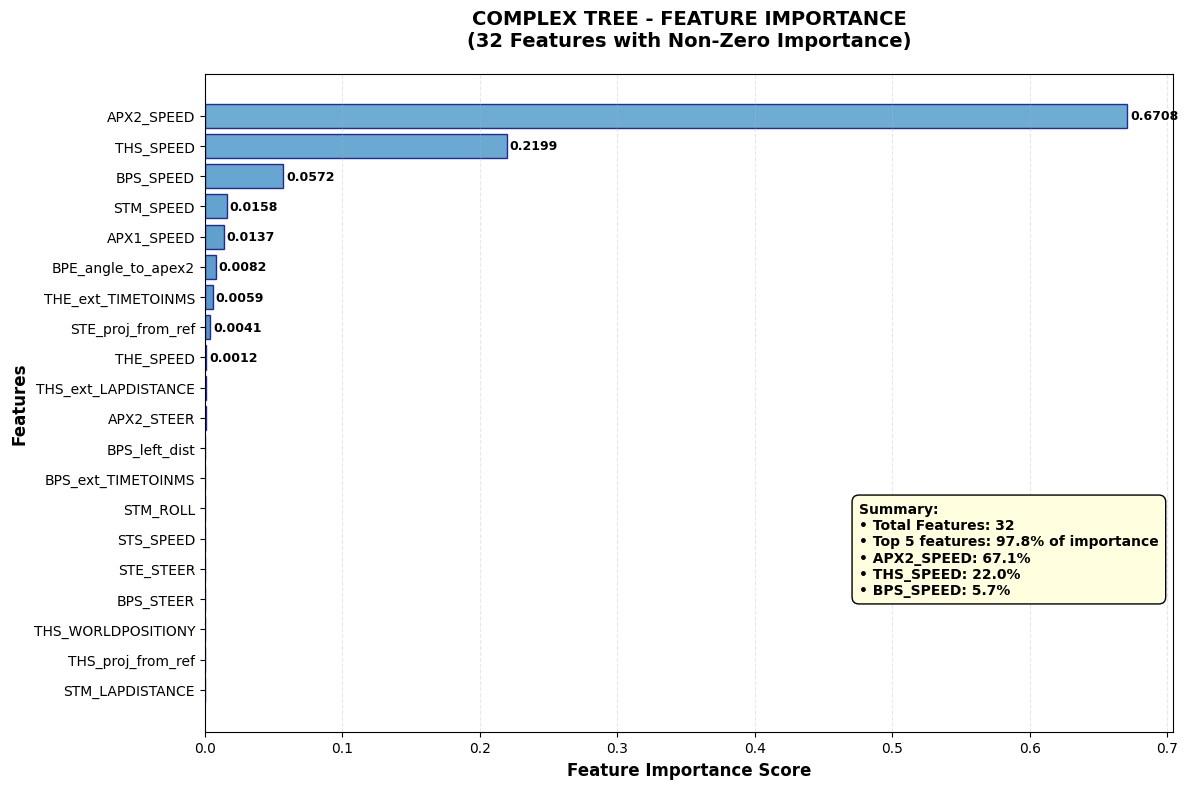

In [51]:
# Creating the graph
plt.figure(figsize=(12, 8))

# Color gradient
colors = plt.cm.Blues(np.linspace(0.6, 0.9, len(complex_df)))

bars = plt.barh(complex_df['feature'], complex_df['importance'],
                color=colors, edgecolor='navy', alpha=0.8)

# Add value labels on bars (only show for significant values)
for bar in bars:
    width = bar.get_width()
    if width > 0.001:  # Only label bars with importance > 0.001
        plt.text(width + 0.002, bar.get_y() + bar.get_height()/2,
                 f'{width:.4f}', ha='left', va='center',
                 fontweight='bold', fontsize=9)

# Customize the graph
plt.xlabel('Feature Importance Score', fontsize=12, fontweight='bold')
plt.ylabel('Features', fontsize=12, fontweight='bold')
plt.title('COMPLEX TREE - FEATURE IMPORTANCE\n(32 Features with Non-Zero Importance)',
          fontsize=14, fontweight='bold', pad=20)
plt.gca().invert_yaxis()  # Highest importance at top
plt.grid(axis='x', alpha=0.3, linestyle='--')

# Add summary statistics
total_importance = complex_df['importance'].sum()
top_5_total = complex_df.head(5)['importance'].sum()

plt.figtext(0.72, 0.25,
            f'''Summary:
• Total Features: 32
• Top 5 features: {top_5_total/total_importance*100:.1f}% of importance
• APX2_SPEED: {complex_df.iloc[0]['importance']/total_importance*100:.1f}%
• THS_SPEED: {complex_df.iloc[1]['importance']/total_importance*100:.1f}%
• BPS_SPEED: {complex_df.iloc[2]['importance']/total_importance*100:.1f}%''',
            bbox=dict(boxstyle="round,pad=0.5", facecolor="lightyellow"),
            fontsize=10, fontweight='bold')
plt.tight_layout()
plt.show()

In [52]:
# Print comparison with original tree
print("=== COMPARISON WITH ORIGINAL TREE ===")
print(f"Original Tree: 7 features with importance > 0")
print(f"Complex Tree:  32 features with importance > 0")
print(f"Improvement:   +25 features discovered!")
print(f"\nNew important features found:")
new_features = ['THS_SPEED', 'BPE_angle_to_apex2', 'THE_ext_TIMETOINMS', 'STE_proj_from_ref', 'APX2_STEER']
for feature in new_features:
    if feature in complex_df['feature'].values:
        imp = complex_df[complex_df['feature'] == feature]['importance'].values[0]
        print(f"  - {feature}: {imp:.4f}")

=== COMPARISON WITH ORIGINAL TREE ===
Original Tree: 7 features with importance > 0
Complex Tree:  32 features with importance > 0
Improvement:   +25 features discovered!

New important features found:
  - THS_SPEED: 0.2199
  - BPE_angle_to_apex2: 0.0082
  - THE_ext_TIMETOINMS: 0.0059
  - STE_proj_from_ref: 0.0041
  - APX2_STEER: 0.0007


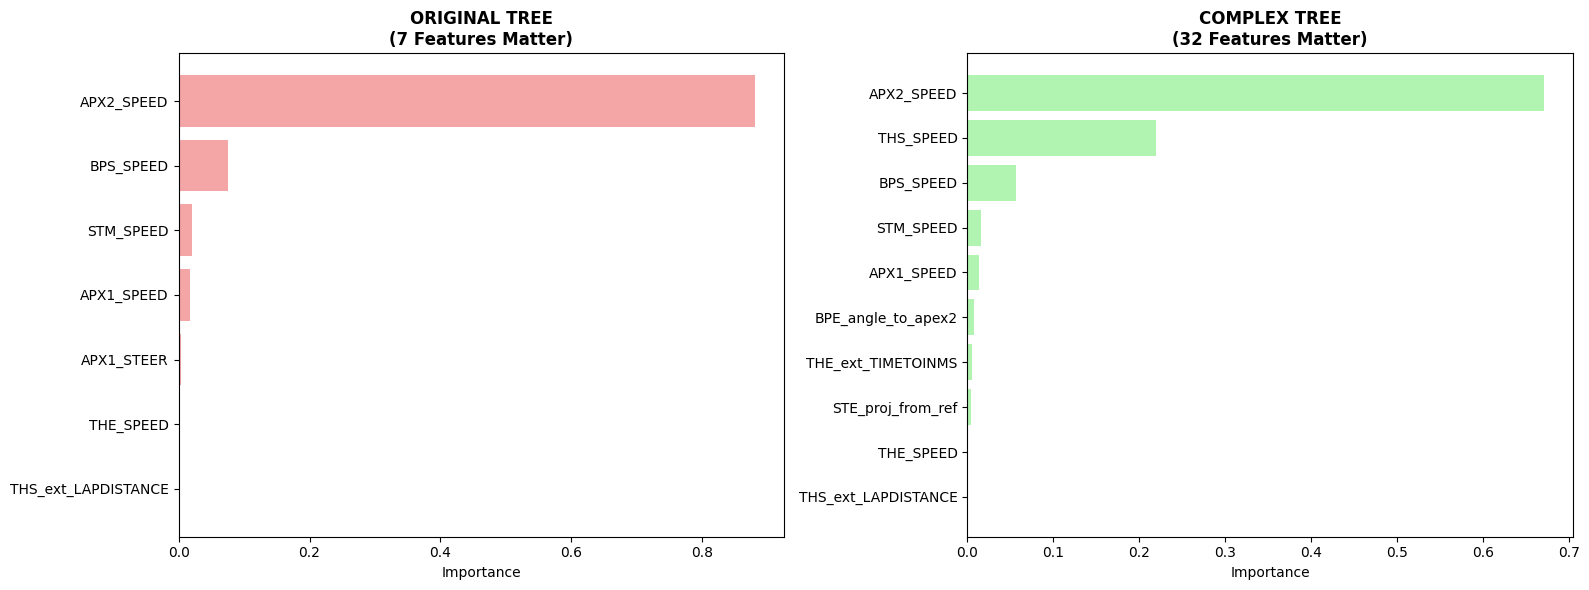

In [53]:
# Compare original vs complex tree for top features
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Original Tree (top 7)
original_top = ['APX2_SPEED', 'BPS_SPEED', 'STM_SPEED', 'APX1_SPEED', 'APX1_STEER', 'THE_SPEED', 'THS_ext_LAPDISTANCE']
original_imp = [0.880578, 0.075210, 0.020839, 0.016919, 0.003906, 0.001571, 0.000977]

ax1.barh(original_top, original_imp, color='lightcoral', alpha=0.7)
ax1.set_xlabel('Importance')
ax1.set_title('ORIGINAL TREE\n(7 Features Matter)', fontweight='bold')
ax1.invert_yaxis()

# Complex Tree (top 10)
complex_top = complex_df.head(10)['feature'].tolist()
complex_imp = complex_df.head(10)['importance'].tolist()

ax2.barh(complex_top, complex_imp, color='lightgreen', alpha=0.7)
ax2.set_xlabel('Importance')
ax2.set_title('COMPLEX TREE\n(32 Features Matter)', fontweight='bold')
ax2.invert_yaxis()

plt.tight_layout()
plt.show()

In [54]:
# === COMPARISON ===
print("\n" + "="*50)
print("SUMMARY COMPARISON")
print("="*50)

print(f"Original Tree: {non_zero_orig} features matter")
print(f"Complex Tree:  {non_zero_comp} features matter")
print(f"Improvement:   {non_zero_comp - non_zero_orig} more features discovered")

print(f"\nOriginal Tree RMSE: {test_rmse_orig:.2f} ms")
print(f"Complex Tree RMSE:  {test_rmse_comp:.2f} ms")
print(f"RMSE Change:        {test_rmse_comp - test_rmse_orig:+.2f} ms")


SUMMARY COMPARISON
Original Tree: 7 features matter
Complex Tree:  32 features matter
Improvement:   25 more features discovered

Original Tree RMSE: 992.44 ms
Complex Tree RMSE:  679.19 ms
RMSE Change:        -313.24 ms


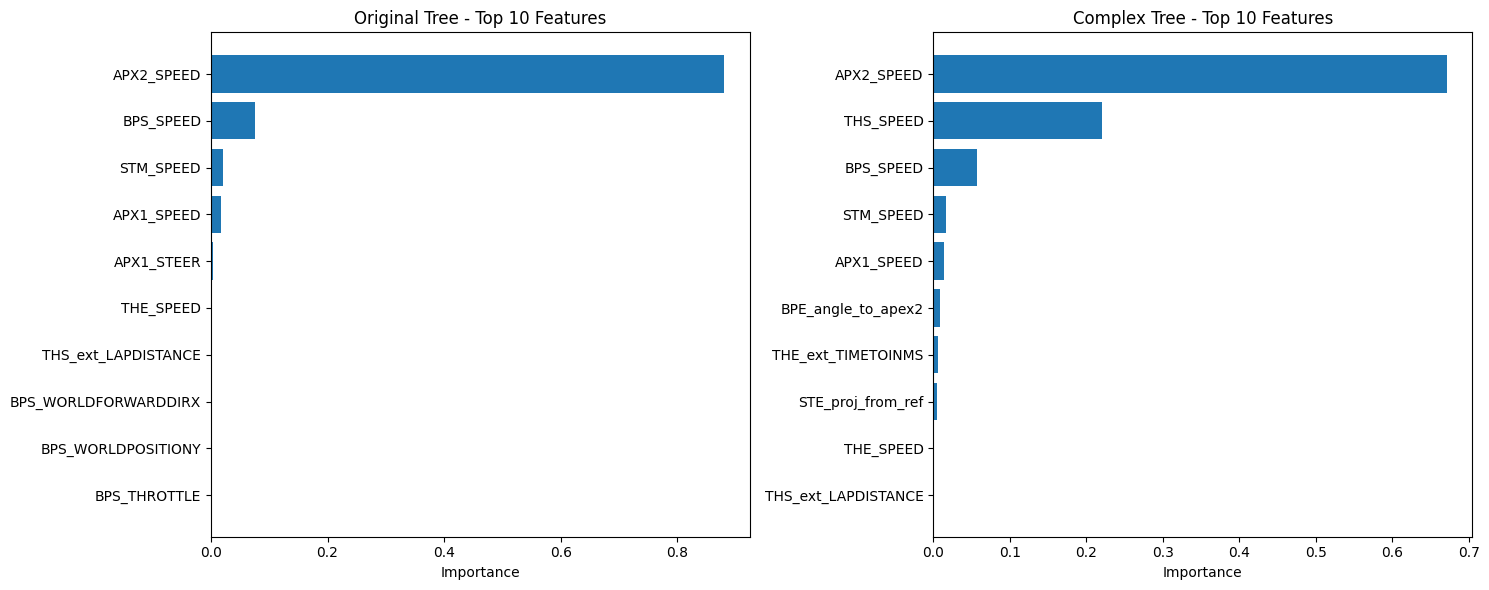

In [55]:
# === VISUALIZATION ===
plt.figure(figsize=(15, 6))

# Plot 1: Original Tree
plt.subplot(1, 2, 1)
top_orig = importance_df_orig.head(10)
plt.barh(top_orig['feature'], top_orig['importance'])
plt.xlabel('Importance')
plt.title('Original Tree - Top 10 Features')
plt.gca().invert_yaxis()

# Plot 2: Complex Tree
plt.subplot(1, 2, 2)
top_comp = importance_df_comp.head(10)
plt.barh(top_comp['feature'], top_comp['importance'])
plt.xlabel('Importance')
plt.title('Complex Tree - Top 10 Features')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()